# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

Los datos los encontraremos en el fichero `reviews_sentiment.csv`

Para facilitar el ejercicio, las columnas que utilizaremos serán: **wordcount** con la cantidad de palabras utilizadas y **sentimentValue** con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5. El campo se llama **Star Rating**

Pasos a seguir:

* Análisis inicial de los datos (visual)
* Escalado de los datos
* Separamos en train y test
* Crear modelo buscando un equilibrio entre las $k$ y la precisión (o métrica objetivo)
* Disponer un reporte de clasificación y matriz de confusión
* Concluir con el modelo obtenido y su métrica de rendimiento

In [21]:
# Análisis inicial de los datos (visual) 

In [3]:
import pandas as pd

data = pd.read_csv("C:/Users/rodri/OneDrive/Escritorio/DATA_SCIENCE/CODIGO_CLASES/TheBridge_DSPT_ML/Supervisado/Clasificación/Vecinos próximos/ejercicios/data/reviews_sentiment.csv", sep=";")
data

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


In [13]:
datos = data[["wordcount", "sentimentValue", "Star Rating"]] # Star Rating representa categorias 
datos 

,wordcount,sentimentValue,Star Rating
0,23,-0.486389,1
1,20,-0.586187,1
2,4,-0.602240,1
3,17,-0.616271,1
4,6,-0.651784,1
...,...,...,...
252,3,2.814818,5
253,1,2.924393,5
254,1,2.924393,5
255,1,2.924393,5


In [14]:
datos.describe() # Se observa que 'wordcount' y 'sentimentValue' tienen distintas escalas. Una de las formas de observarlos es con el valor de 'mean' 

,wordcount,sentimentValue,Star Rating
count,257.000000,257.000000,257.000000
mean,11.501946,0.383849,3.420233
std,13.159812,0.897987,1.409531
min,1.000000,-2.276469,1.000000
25%,3.000000,-0.108144,3.000000
50%,7.000000,0.264091,3.000000
75%,16.000000,0.808384,5.000000
max,103.000000,3.264579,5.000000


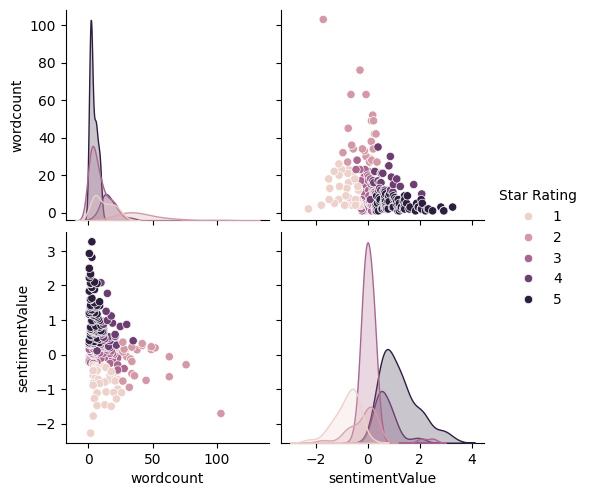

In [15]:
import seaborn as sns # Calcula las distribuciones en base a las distintas categorias. Los colores están de acuerdo al comportamiento de la variable 'Star Rating'

sns.pairplot(data, hue=("Star Rating"))

In [ ]:
# HAY DIFERENCIAS DE LAS DISTRIBUCIONES DE LAS VARIABLES RESPECTO DE LA DISTRIBUCION DE LA VARIABLE "Star Rating", SOBRETODO EN EL CASO DE LA VARIABLE 
#"sentimentValue". 'Star Rating' ENGLOBA CATEGORIAS, Y ESTAS VAN DESDE EL 1 AL 5  

<Axes: >

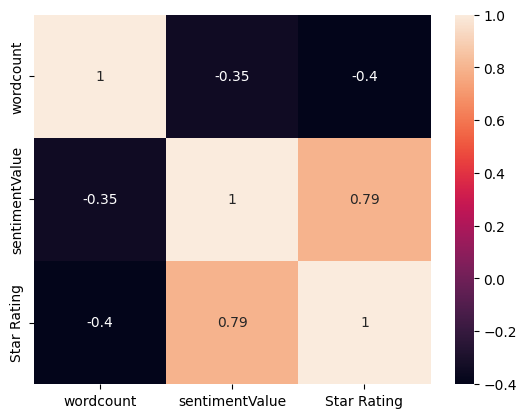

In [19]:
import seaborn as sns

sns.heatmap(datos.corr(), annot=True)

In [4]:
# ESCALADO DE LOS DATOS 

In [23]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las características y la etiqueta
X = data[['wordcount', 'sentimentValue']]
y = data['Star Rating']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [ ]:
# Separar en conjuntos de entrenamiento y prueba 

In [35]:
from sklearn.model_selection import train_test_split

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.16, random_state=42) 

In [9]:
# Definir y crear el modelo KNN 

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Definir los parámetros para GridSearch
param_grid = {'n_neighbors': range(1, 21)} 

In [37]:
# Crear el modelo KNN
knn = KNeighborsClassifier() 
knn

KNeighborsClassifier()

In [20]:
# Crear modelo buscando un equilibrio entre las $k$ y la precisión (o métrica objetivo)

In [38]:
# GridSearch para encontrar el mejor valor de k
grid_search = GridSearchCV(grid_search, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': range(1, 21)}, scoring='accuracy')

In [39]:
grid_search.score(X_train, y_train)

0.9069767441860465

In [40]:
grid_search.score(X_test, y_test)

0.8571428571428571

In [41]:
for k in range(1, 10):
    grid_search = KNeighborsClassifier(n_neighbors=k)
    grid_search.fit(X_train,y_train)
    print('k=', k) # k ES LA CANTIDAD DE VECINOS CON QUE SE REALIZAN EL TRAIN Y EL TEST DEL MODELO 
    print('Train', grid_search.score(X_train, y_train)) # CON 'k = 3' ES CUANDO MÁS BALANCEADOS ESTAN LOS VALORES DE 'Train' Y 'Test' 
    print('Test', grid_search.score(X_test, y_test))
    print('-'*50) 

k= 1
Train 0.9813953488372092
Test 0.8571428571428571
--------------------------------------------------
k= 2
Train 0.9023255813953488
Test 0.7857142857142857
--------------------------------------------------
k= 3
Train 0.9441860465116279
Test 0.9047619047619048
--------------------------------------------------
k= 4
Train 0.9302325581395349
Test 0.8095238095238095
--------------------------------------------------
k= 5
Train 0.9116279069767442
Test 0.8571428571428571
--------------------------------------------------
k= 6
Train 0.9116279069767442
Test 0.8333333333333334
--------------------------------------------------
k= 7
Train 0.9023255813953488
Test 0.8809523809523809
--------------------------------------------------
k= 8
Train 0.9069767441860465
Test 0.8571428571428571
--------------------------------------------------
k= 9
Train 0.8883720930232558
Test 0.8571428571428571
--------------------------------------------------


In [ ]:
# Disponer un reporte de clasificación y matriz de confusión

In [46]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix 

confusion_matrix(y_test, grid_search.predict(X_test))

array([[ 8,  1,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 2,  0,  9,  0,  0],
       [ 0,  1,  0,  3,  0],
       [ 0,  0,  0,  0, 16]], dtype=int64)

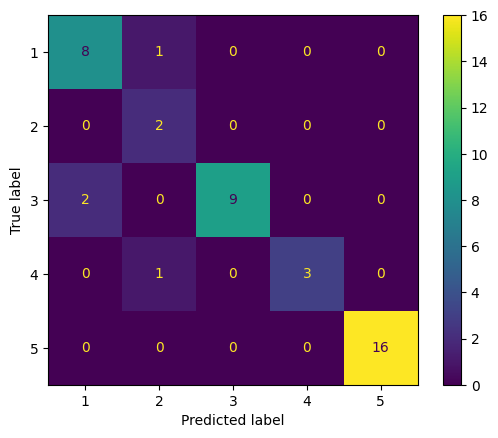

In [50]:
import matplotlib.pyplot as plt 
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, grid_search.predict(X_test), labels=[1, 2, 3, 4, 5]) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = [1, 2, 3, 4, 5])
disp.plot()
plt.show()  

In [ ]:
# DE LA ETIQUETA 1 SE TENIAN 9 MUESTRAS, A 8 DE ELLAS LAS HA ACERTADO ASIGNANDOLE LA ETIQUETA 1 Y A LA OTRA ETIQUETA SE LE PREDIJO ERRONEAMENTE QUE ERA DE LA
#ETIQUETA 2; EL MISMO ANALISIS SE HACE CON LAS OTRAS 4 ETIQUETAS 

In [43]:
# Reporte de clasificación
from sklearn.metrics import classification_report 

grid_search = KNeighborsClassifier(n_neighbors=3) 
grid_search.fit(X_train, y_train) 

print(classification_report(y_test, grid_search.predict(X_test))) 

              precision    recall  f1-score   support

           1       0.80      0.89      0.84         9
           2       0.50      1.00      0.67         2
           3       1.00      0.82      0.90        11
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00        16

    accuracy                           0.90        42
   macro avg       0.86      0.89      0.85        42
weighted avg       0.93      0.90      0.91        42



In [53]:
# LA TASA DE ACIERTO DEL MODELO ES DE 0.91. 
# Y LA TASA DE ACIERTO POR ETIQUETA ES; ETIQUETA 1: 0.84, ETIQUETA 2: 0.67, ETIQUETA 3: 0.90, ETIQUETA 4: 0.86, ETIQUETA 5: 1.00 

In [ ]:
# Concluir con el modelo obtenido y su métrica de rendimiento

In [51]:
# LA DIFICULTAD QUE TIENE LA APLICACIÓN DE ESTE MODELO ES QUE UNA VEZ QUE ESTÁ CONFECCIONADO EL MODELO, SI SE QUIERE APLICAR A OTROS CASOS, SE NECESITA EL
#MODELO Y ADEMÁS LOS DATOS QUE SE UTILIZARON EN SU CONFECCIÓN. POR LO CUAL EN EL CASO DE LAS EMPRESAS, ESTAS NO VAN A ACCEDER A PRESTAR SUS DATOS PARA
#APLICAR EL MODELO EN OTRA EMPRESA. 